
Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

$$
MSE = \frac {1} {n} \sum^n (\hat y - y)^2 \\
RMSE = \sqrt { \frac {1} {n} \sum^n (\hat y - y)^2}
$$

MSE measures the the average of squared error or the average squared disffernce between the estimated values and the actual values. MSE is a measure of the quality of an estimator and is derived from the sqaure of the Euclidean distance, hence, it is always positive and approaches zero as the the estimator performs better with less error.

RMSE is differentiable function and used as a default metric for calculating a loss function. Typically the units are the same as what is on the y-axis, while MSE is squared.

- wiki: [MSE](https://en.wikipedia.org/wiki/Mean_squared_error)

Mean Absolute Error (MAE)

$$
MAE = \frac {1} {n} \sum^n_i | \hat y_i - y_i | \\
MAE_{weighted} = \frac {1} {n} \sum^n_i | \hat y_i - y_i | w_i
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass, field

In [83]:
# @dataclass()
class Error:
    def __init__(self):
        self.num: int = 0 # number points
        self.val = None   # current squared value
        self.buf = []     # value / num
    
    def reset(self):
        self.num = 0
        self.val = None
        self.buf = []
    
    def update(self, err, store=False):
        if self.val is None:
            self.val = err**2
        else:
            self.val += err**2
        
        self.num += 1
        
        if store:
            self.buf.append(self.val / self.num)

    @property
    def mse(self):
        return self.val / self.num

    @property
    def rmse(self):
        return np.sqrt(self.val / self.num)
    
    @property
    def mse_hist(self):
        return self.buf

    @property
    def rmse_hist(self):
        return np.sqrt(self.buf)
        
# class MAE(Error):
    
#     def update(self, err):
#         if self.val is None:
#             self.val = np.abs(err)
#         else:
#             self.val += np.abs(err)
#         self.num += 1
#         return self.val / self.num
    
#     @property
#     def mae(self):
#         return self.val / self.num
    
    
# class MSE(Error):
    
#     def update(self, err):
#         if self.val is None:
#             self.val = err**2
#         else:
#             self.val += err**2
#         self.num += 1
#         return self.val / self.num
    
#     @property
#     def mse(self):
#         return self.val / self.num
    
    
# class RMSE(Error):
    
#     def update(self, err):
#         if self.val is None:
#             self.val = err**2
#         else:
#             self.val += err**2
#         self.num += 1
#         return np.sqrt(self.val / self.num)

#     @property
#     def rmse(self):
#         return np.sqrt(self.val / self.num)

In [85]:
x = np.sin(np.arange(0,2*np.pi,0.1))

# mae = MAE()
mse = Error()
rmse = Error()

for v in x:
    # mae.update(v)
    mse.update(v, True)
    rmse.update(v, True)
    
print(mae.mae, mse.mse, rmse.rmse)

[0.63488815 0.63488815 0.63488815] 0.4986679588469106 0.706164257695694


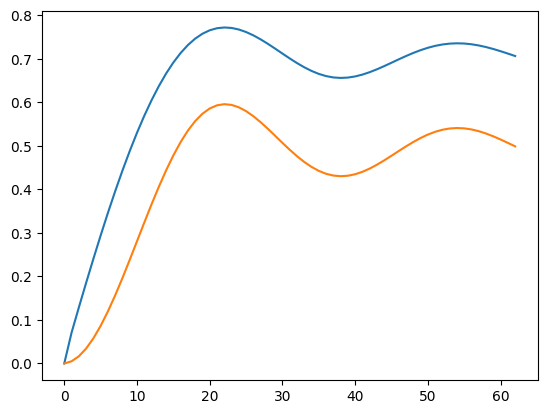

In [87]:
plt.plot(rmse.rmse_hist);
plt.plot(mse.mse_hist)

In [80]:
x = np.sin(np.arange(0,2*np.pi,0.1))
x = np.vstack((x,x,x)).T

mae = MAE(); mae.reset()
mse = MSE(); mse.reset()
rmse = RMSE(); rmse.reset()

for v in x:
    mae.updateStore(v)
    mse.updateStore(v)
    rmse.updateStore(v)
    
print(mae.mae, mse.mse, rmse.rmse)

[0.63488815 0.63488815 0.63488815] [0.49866796 0.49866796 0.49866796] [0.70616426 0.70616426 0.70616426]


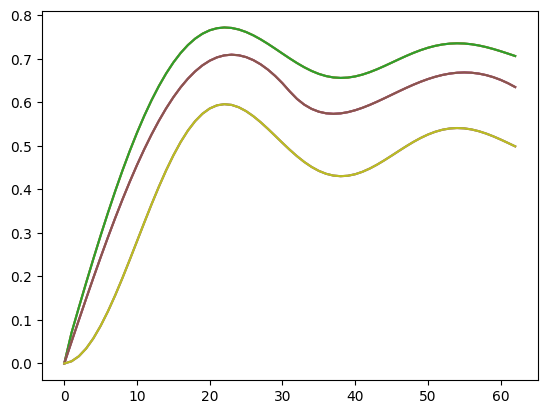

In [81]:
plt.plot(rmse.buf)
plt.plot(mae.buf)
plt.plot(mse.buf);

In [82]:
r = RMSE()
r.buf

[]

In [ ]:
class Error:
    def __init__(self):
        self.num: int = 0
        self.val = None
        self.buf = []
    
    def reset(self):
        self.num = 0
        self.val = None
        self.buf = []
    
    def update(self, err, store=False):
        self.num += 1
        if self.val is None:
            self.val = err**2
        else:
            self.val += err**2
        
        if store:
            self.buf.append(self.val / self.num)
            
        # return self.val / self.num
#     @property
#     def value(self):
#         return self.val / 
    
#     @property
#     def hist(self):
#         return self.buf
    # @property
    # def mae(self):
    #     return np.sqrt(self.val) / self.num

    @property
    def mse(self):
        return self.val / self.num

    @property
    def rmse(self):
        return np.sqrt(self.val / self.num)
    
    @property
    def mse_hist(self):
        return self.buf

    @property
    def rmse_hist(self):
        return np.sqrt(self.buf)